# Dataset Overview:

This data set is abt ad campaigns for "KINDLE".

there are 2 campaigns in dataset.

1) AKIN9326: persuasive as focused on long term benefits of reading in one's professional life and how kindle will help with reading.

2) AKIN8012: persuasive ad focused on instilling fear in-peoples mind about about what will happen to professional career if they dont read regularly.

Objective:
which ad campaign led to more conversions???


# Import library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import kaggle

# Collect Dataset from kaggle

In [2]:
!kaggle datasets download marc3987/ab-testing-dataset


  0%|          | 0.00/74.7k [00:00<?, ?B/s]
100%|##########| 74.7k/74.7k [00:00<00:00, 222kB/s]
100%|##########| 74.7k/74.7k [00:00<00:00, 222kB/s]



Dataset URL: https://www.kaggle.com/datasets/marc3987/ab-testing-dataset
License(s): unknown



In [4]:
import zipfile
zip_ref = zipfile.ZipFile('ab-testing-dataset.zip')
zip_ref.extractall()
zip_ref.close()

In [5]:
df=pd.read_excel('kindle AB testing dataset.xlsx')
df

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.920000,5,1
1,1121091,AKIN9326,30-34,M,Business & industry,1194718,141,254.049996,3,1
2,1121092,AKIN9326,30-34,M,Business & industry,637648,67,122.400000,3,0
3,1121094,AKIN9326,30-34,M,Business & industry,24362,0,0.000000,1,1
4,1121095,AKIN9326,30-34,M,Business & industry,459690,50,86.330001,3,2
...,...,...,...,...,...,...,...,...,...,...
1245,1314303,AKIN8012,30-34,M,Entertainment (Reading),496760,42,61.009999,10,3
1246,1121246,AKIN8012,30-34,M,Business & industry,105047,13,20.209999,3,1
1247,1314393,AKIN8012,40-44,F,Entertainment (Reading),877535,149,217.779997,5,2
1248,1121824,AKIN8012,30-34,F,Business & industry,1705246,295,429.479998,23,10


# Understanding Data

In [6]:
# to see first five rows
df.head(5)

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.920000,5,1
1,1121091,AKIN9326,30-34,M,Business & industry,1194718,141,254.049996,3,1
2,1121092,AKIN9326,30-34,M,Business & industry,637648,67,122.400000,3,0
3,1121094,AKIN9326,30-34,M,Business & industry,24362,0,0.000000,1,1
4,1121095,AKIN9326,30-34,M,Business & industry,459690,50,86.330001,3,2


In [7]:
# to see last five rows
df.tail(5)

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1245,1314303,AKIN8012,30-34,M,Entertainment (Reading),496760,42,61.009999,10,3
1246,1121246,AKIN8012,30-34,M,Business & industry,105047,13,20.209999,3,1
1247,1314393,AKIN8012,40-44,F,Entertainment (Reading),877535,149,217.779997,5,2
1248,1121824,AKIN8012,30-34,F,Business & industry,1705246,295,429.479998,23,10
1249,1121336,AKIN8012,35-39,M,Business & industry,275080,43,69.660000,4,3


In [8]:
# to see random five rows
df.sample(5)

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
358,1121839,AKIN9326,30-34,F,Business & industry,13911,1,1.730000,1,1
361,1121844,AKIN9326,30-34,F,Business & industry,149808,20,33.039999,1,1
308,1121742,AKIN9326,30-34,F,Business & industry,213016,30,44.220000,2,2
476,1122191,AKIN9326,45-49,F,Business & industry,382776,97,132.730001,5,1
677,735213,AKIN8012,45-49,F,Business & industry,73634,23,32.980000,1,0


In [9]:
# to see data shape
df.shape

(1250, 10)

In [10]:
# to see columns name
df.columns

Index(['ad_id', 'campaign_id', 'age', 'gender', 'interest', 'Impressions',
       'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'],
      dtype='object')

In [11]:
# to see datatypes
df.dtypes

ad_id                    int64
campaign_id             object
age                     object
gender                  object
interest                object
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [12]:
# to see basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1250 non-null   int64  
 1   campaign_id          1250 non-null   object 
 2   age                  1250 non-null   object 
 3   gender               1250 non-null   object 
 4   interest             1250 non-null   object 
 5   Impressions          1250 non-null   int64  
 6   Clicks               1250 non-null   int64  
 7   Spent                1250 non-null   float64
 8   Total_Conversion     1250 non-null   int64  
 9   Approved_Conversion  1250 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 97.8+ KB


In [13]:
# to see basic statistics
df.describe()

,ad_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.250000e+03,1.250000e+03,1250.000000,1250.000000,1250.000000,1250.000000
mean,9.934780e+05,1.926565e+05,34.439200,52.822048,2.227200,0.605600
std,1.919406e+05,3.197824e+05,58.504651,88.814661,2.999797,0.967263
min,7.087710e+05,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.782640e+05,7.310000e+03,1.000000,1.540000,1.000000,0.000000
50%,1.121212e+06,5.604400e+04,9.000000,13.410000,1.000000,0.000000
75%,1.121817e+06,2.278120e+05,38.750000,61.009999,2.000000,1.000000
max,1.314415e+06,3.052003e+06,421.000000,639.949998,38.000000,13.000000


# Data Cleaning & Feature Engineering

In [14]:
# check duplicated values
df.duplicated().sum()

70

In [15]:
# delete duplicated vlues
df.drop_duplicates(inplace=True)

In [16]:
# check missing values
df.isnull().sum()

ad_id                  0
campaign_id            0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [17]:
# seperate categorical and numerical columns
cat_col=df.select_dtypes(include=object)

In [89]:
num_col=df.select_dtypes(exclude=object)

In [52]:
# add ctr columns
df['CTR']=np.where((df['Clicks']==0) | (df['Impressions']==0),np.nan,
                  (df['Clicks']/df['Impressions'])*100)

In [50]:
# add cost per conversion columns
df['cost_per_conversion']=np.where((df['Spent']==0) | (df['Approved_Conversion']==0),np.nan,
                                  df['Spent']/df['Approved_Conversion'])

In [54]:
# add conversion rate columns
df['conversion_rate(%)']=np.where((df['Approved_Conversion']==0) | (df['Total_Conversion']==0),np.nan,
                                 (df['Approved_Conversion'] / df['Total_Conversion'])*100)

In [55]:
df.head(5)

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,cost_per_conversion,conversion_rate(%)
0,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.920000,5,1,0.014202,78.920000,20.000000
1,1121091,AKIN9326,30-34,M,Business & industry,1194718,141,254.049996,3,1,0.011802,254.049996,33.333333
2,1121092,AKIN9326,30-34,M,Business & industry,637648,67,122.400000,3,0,0.010507,NaN,NaN
3,1121094,AKIN9326,30-34,M,Business & industry,24362,0,0.000000,1,1,NaN,NaN,100.000000
4,1121095,AKIN9326,30-34,M,Business & industry,459690,50,86.330001,3,2,0.010877,43.165001,66.666667


In [57]:
df.isnull().sum()

ad_id                    0
campaign_id              0
age                      0
gender                   0
interest                 0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
CTR                    201
cost_per_conversion    728
conversion_rate(%)     666
dtype: int64

In [66]:
dff=df.copy()

In [67]:
dff['CTR']=df['CTR'].fillna(0)

In [68]:
dff['cost_per_conversion']=df['cost_per_conversion'].fillna(0)

In [69]:
dff['conversion_rate(%)']=df['conversion_rate(%)'].fillna(0)

In [70]:
dff.isnull().sum()

ad_id                  0
campaign_id            0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
CTR                    0
cost_per_conversion    0
conversion_rate(%)     0
dtype: int64

In [71]:
df=dff.copy()

In [75]:
df.head(1)

,ad_id,campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cost_per_conversion,conversion_rate(%)
0,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.92,5,1,0.014202,78.92,20.0


In [73]:
df.columns=df.columns.str.lower()

# Exploratory Data Analysis

## Campaign Id Performance Analysis

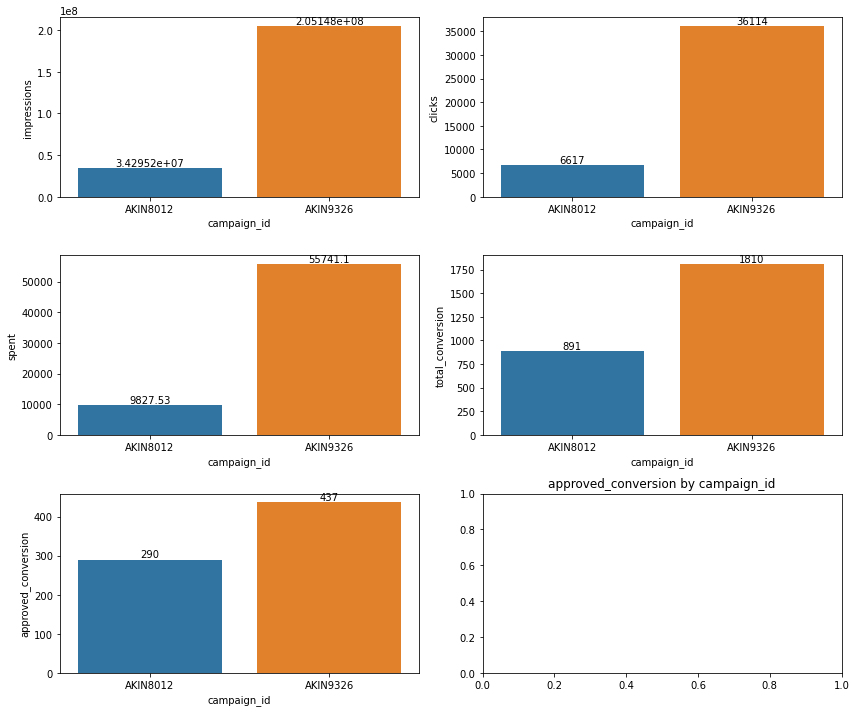

In [136]:

columns = ['impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']

num_columns = len(columns)
num_rows = (num_columns + 1) // 2  # Adjusting for uneven number of columns

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 10))

for i, value in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    campaign_type = df.groupby(['campaign_id'])[value].sum().reset_index()
    ax = axes[row_index, col_index]
    sns.barplot(data=campaign_type, x='campaign_id', y=value, ax=ax)
    for j in ax.containers:
        ax.bar_label(j)
   
    plt.title(f"{value} by campaign_id")
plt.subplots_adjust(hspace=1, wspace=1)  # Adjust space between subplots
plt.tight_layout()



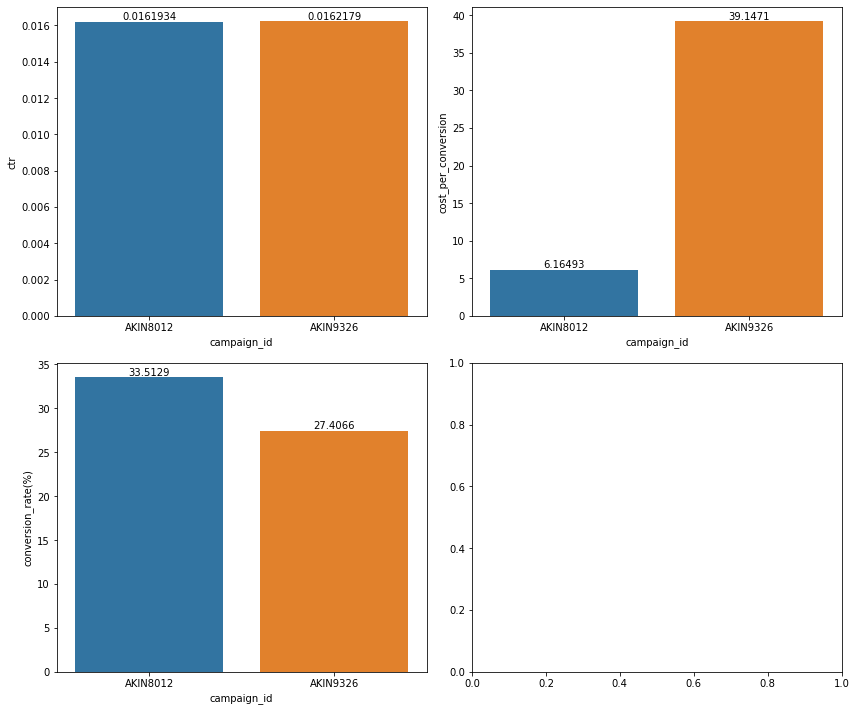

In [132]:

column = ['ctr', 'cost_per_conversion', 'conversion_rate(%)']

num_columns = len(columns)
num_rows = (num_columns + 1) // 3  # Adjusting for uneven number of columns

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 10))

for i, value in enumerate(column):
    row_index = i // 2
    col_index = i % 2
    campaign_type = df.groupby(['campaign_id'])[value].mean().reset_index()
    ax = axes[row_index, col_index]
    sns.barplot(data=campaign_type, x='campaign_id', y=value, ax=ax)
    for j in ax.containers:
        ax.bar_label(j)
plt.subplots_adjust(hspace=1, wspace=1)  # Adjust space between subplots
plt.tight_layout()

In [144]:
campaign_type=df.groupby(['campaign_id']).agg(
{
    "impressions":"sum",
    "clicks":"sum",
    "spent":"sum",
    "total_conversion":"sum",
    "approved_conversion":"sum",
    "ctr":"mean",
    "cost_per_conversion":"mean",
    "conversion_rate(%)":"mean"
}

)

campaign_type.columns=['Total_Impressions','Total_Clicks','Total_Spent','total_conversion','Total_Approved_Conversion','Avg_CTR','Avg_Cost_Per_Conversion','Avg_Conversion_Rate(%)']
campaign_type

,Total_Impressions,Total_Clicks,Total_Spent,total_conversion,Total_Approved_Conversion,Avg_CTR,Avg_Cost_Per_Conversion,Avg_Conversion_Rate(%)
campaign_id,,,,,,,,
AKIN8012,34295216,6617,9827.529982,891,290,0.016193,6.164932,33.512932
AKIN9326,205147615,36114,55741.069959,1810,437,0.016218,39.147057,27.406649


## Insight:

AKIN9326 exhibits higher total impressions, clicks, and conversions compared to AKIN8012, suggesting broader reach and better engagement.

However, AKIN8012 demonstrates superior efficiency in conversion metrics, with a lower cost per conversion and a higher conversion rate.

## Gender Type Performance Analysis

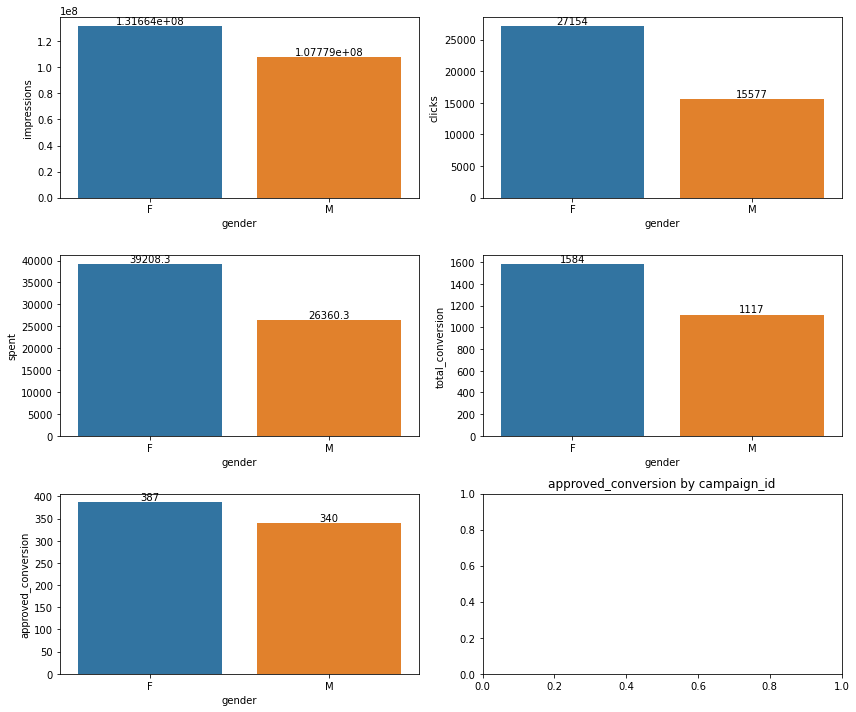

In [138]:

columns = ['impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']

num_columns = len(columns)
num_rows = (num_columns + 1) // 2  # Adjusting for uneven number of columns

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 10))

for i, value in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    campaign_type = df.groupby(['gender'])[value].sum().reset_index()
    ax = axes[row_index, col_index]
    sns.barplot(data=campaign_type, x='gender', y=value, ax=ax)
    for j in ax.containers:
        ax.bar_label(j)
   
    plt.title(f"{value} by campaign_id")
plt.subplots_adjust(hspace=1, wspace=1)  # Adjust space between subplots
plt.tight_layout()


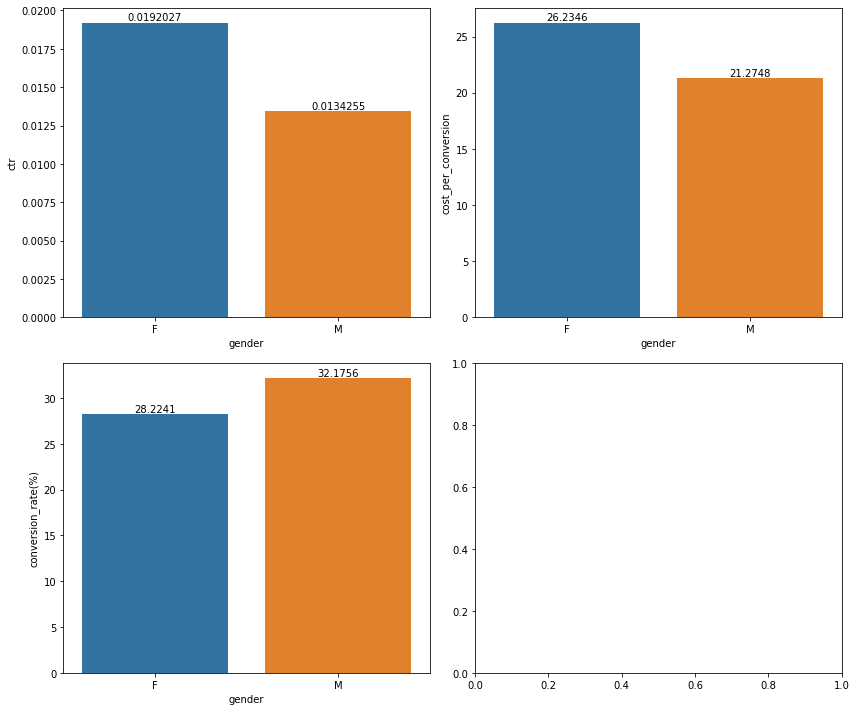

In [139]:

column = ['ctr', 'cost_per_conversion', 'conversion_rate(%)']

num_columns = len(columns)
num_rows = (num_columns + 1) // 3  # Adjusting for uneven number of columns

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 10))

for i, value in enumerate(column):
    row_index = i // 2
    col_index = i % 2
    campaign_type = df.groupby(['gender'])[value].mean().reset_index()
    ax = axes[row_index, col_index]
    sns.barplot(data=campaign_type, x='gender', y=value, ax=ax)
    for j in ax.containers:
        ax.bar_label(j)
plt.subplots_adjust(hspace=1, wspace=1)  # Adjust space between subplots
plt.tight_layout()

In [143]:
gender_type=df.groupby(['gender']).agg(
{
    "impressions":"sum",
    "clicks":"sum",
    "spent":"sum",
    "total_conversion":"sum",
    "approved_conversion":"sum",
    "ctr":"mean",
    "cost_per_conversion":"mean",
    "conversion_rate(%)":"mean"
}

)

gender_type.columns=['Total_Impressions','Total_Clicks','Total_Spent','total_conversion','Total_Approved_Conversion','Avg_CTR','Avg_Cost_Per_Conversion','Avg_Conversion_Rate(%)']
gender_type

,Total_Impressions,Total_Clicks,Total_Spent,total_conversion,Total_Approved_Conversion,Avg_CTR,Avg_Cost_Per_Conversion,Avg_Conversion_Rate(%)
gender,,,,,,,,
F,131664114,27154,39208.259947,1584,387,0.019203,26.234587,28.224097
M,107778717,15577,26360.339995,1117,340,0.013425,21.274811,32.175555


## Insight:

Impressions and Clicks: Females exhibit higher total impressions and clicks compared to males, indicating greater engagement and exposure among female users.
    
Cost and Conversion: Despite fewer impressions and clicks, males have a lower total spend and a more cost-effective conversion rate compared to females.
    
Conversion Rate: Females demonstrate a higher average conversion rate, suggesting a greater propensity to take desired actions.

## Age Group Performance Analysis

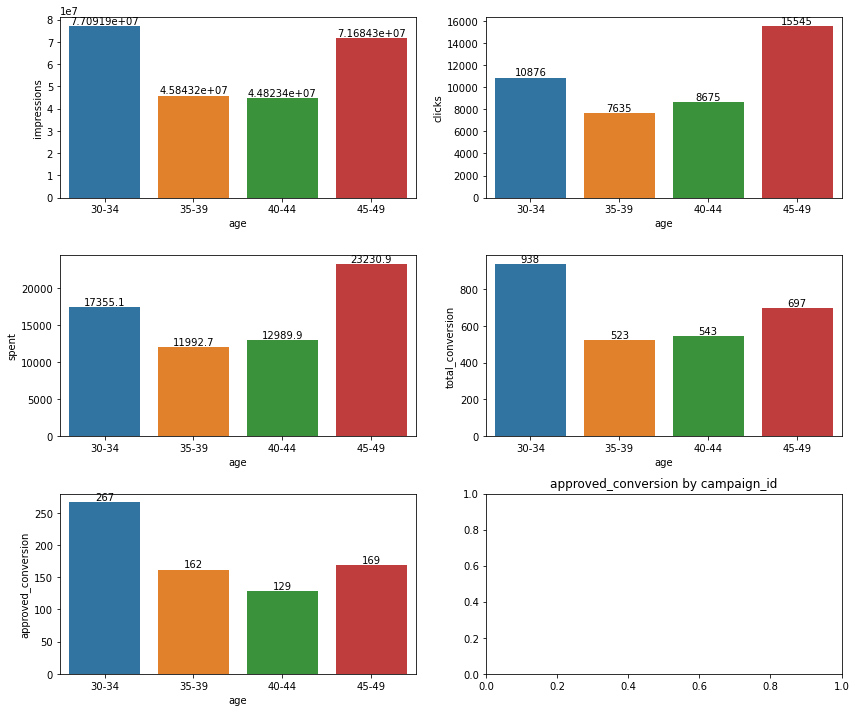

In [148]:
columns = ['impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']

num_columns = len(columns)
num_rows = (num_columns + 1) // 2  # Adjusting for uneven number of columns

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 10))

for i, value in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    campaign_type = df.groupby(['age'])[value].sum().reset_index()
    ax = axes[row_index, col_index]
    sns.barplot(data=campaign_type, x='age', y=value, ax=ax)
    for j in ax.containers:
        ax.bar_label(j)
   
    plt.title(f"{value} by campaign_id")
plt.subplots_adjust(hspace=1, wspace=1)  # Adjust space between subplots
plt.tight_layout()

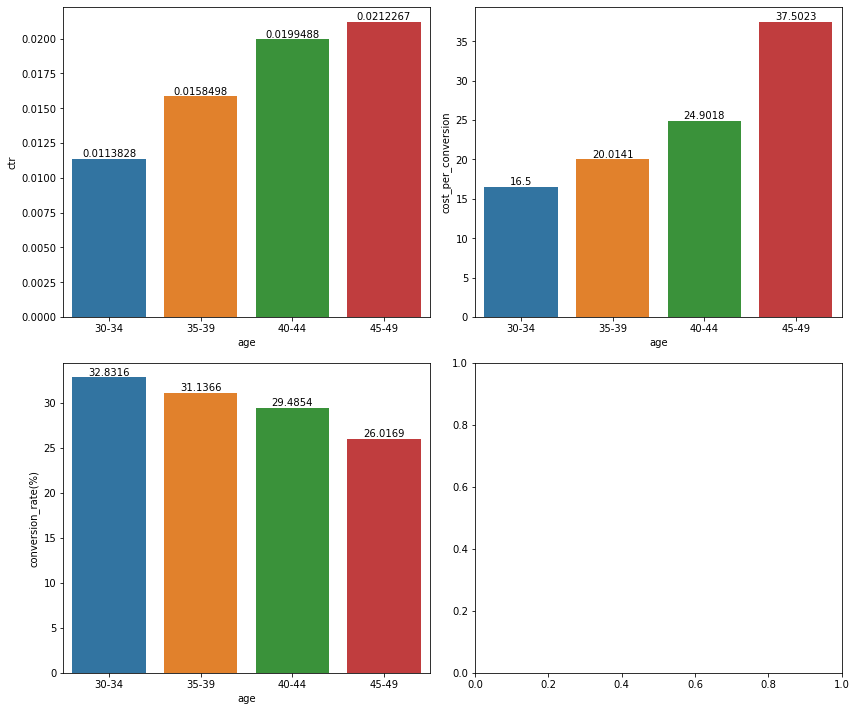

In [147]:
column = ['ctr', 'cost_per_conversion', 'conversion_rate(%)']

num_columns = len(columns)
num_rows = (num_columns + 1) // 3  # Adjusting for uneven number of columns

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 10))

for i, value in enumerate(column):
    row_index = i // 2
    col_index = i % 2
    campaign_type = df.groupby(['age'])[value].mean().reset_index()
    ax = axes[row_index, col_index]
    sns.barplot(data=campaign_type, x='age', y=value, ax=ax)
    for j in ax.containers:
        ax.bar_label(j)
plt.subplots_adjust(hspace=1, wspace=1)  # Adjust space between subplots
plt.tight_layout()

In [146]:
age_type=df.groupby(['age']).agg(
{
    "impressions":"sum",
    "clicks":"sum",
    "spent":"sum",
    "total_conversion":"sum",
    "approved_conversion":"sum",
    "ctr":"mean",
    "cost_per_conversion":"mean",
    "conversion_rate(%)":"mean"
}

)

age_type.columns=['Total_Impressions','Total_Clicks','Total_Spent','total_conversion','Total_Approved_Conversion','Avg_CTR','Avg_Cost_Per_Conversion','Avg_Conversion_Rate(%)']
age_type

,Total_Impressions,Total_Clicks,Total_Spent,total_conversion,Total_Approved_Conversion,Avg_CTR,Avg_Cost_Per_Conversion,Avg_Conversion_Rate(%)
age,,,,,,,,
30-34,77091917,10876,17355.079984,938,267,0.011383,16.499988,32.831582
35-39,45843178,7635,11992.739993,523,162,0.015850,20.014086,31.136642
40-44,44823435,8675,12989.919975,543,129,0.019949,24.901752,29.485360
45-49,71684301,15545,23230.859989,697,169,0.021227,37.502252,26.016892


## Insights:

Engagement and Conversion: The "30-34" age group leads in total impressions, clicks, and conversions, indicating high engagement and conversion potential.
    
Cost Efficiency: Despite lower impressions and clicks, the "35-39" age group demonstrates cost-effective spending, suggesting efficient advertising targeting this segment.
    
CTR and Conversion Rates: The "45-49" age group exhibits the highest average CTR, while the "30-34" age group has the lowest average cost per conversion, indicating potential areas for optimization.